## Data Analysis Nanodegree Program - Project 1 (Exploring Weather Trends)

### Import all our dependencies

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the CSV's

In [20]:
global_data_frame = pd.read_csv("global_data.csv").sort_values("year")
global_data_frame.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [21]:
cities_data_frame = pd.read_csv("cities.csv", usecols=["city", "country", "year", "avg_temp"])
cities_data_frame.head()

,city,country,year,avg_temp
0,Abidjan,Côte D'Ivoire,1849,25.58
1,Abidjan,Côte D'Ivoire,1850,25.52
2,Abidjan,Côte D'Ivoire,1851,25.67
3,Abidjan,Côte D'Ivoire,1852,NaN
4,Abidjan,Côte D'Ivoire,1853,NaN


### Discover the cities from my country

In this case it's the **Curitiba** city.

In [22]:
print(cities_data_frame[cities_data_frame["country"].str.contains("Brazil")].city.unique())

curitiba_data_frame = cities_data_frame[cities_data_frame["city"].str.contains("Curitiba")].sort_values("year")
curitiba_data_frame.head()

['Belo Horizonte' 'Campinas' 'Colombo' 'Curitiba' 'Fortaleza' 'Guarulhos'
 'Manaus' 'Porto Alegre' 'Recife' 'Rio De Janeiro' 'Salvador']


,city,country,year,avg_temp
19051,Curitiba,Brazil,1832,16.60
19052,Curitiba,Brazil,1833,17.48
19053,Curitiba,Brazil,1834,16.95
19054,Curitiba,Brazil,1835,16.28
19055,Curitiba,Brazil,1836,16.56


### Clean city data

Here we have 7 records with null data, we could drop them, or just fill them with the median of the city historic temperatures

In [23]:
curitiba_data_frame["avg_temp"].isnull().sum()

7

In [24]:
median = curitiba_data_frame["avg_temp"].median()
curitiba_data_frame["avg_temp"].fillna(median, inplace=True)

In [25]:
curitiba_data_frame["avg_temp"].isnull().sum()

0

### "Moving Average" for the global data and local data

I'm using a 7 day mobing average from the recommendation.

In [26]:
global_moving_average = global_data_frame["avg_temp"].rolling(7).mean()

print(global_moving_average.head(7))
print("\njust checking\n")
print(global_data_frame["avg_temp"].head(7))
print(global_data_frame["avg_temp"].head(7).sum() / 7)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6    8.078571
Name: avg_temp, dtype: float64

just checking

0    8.72
1    7.98
2    5.78
3    8.39
4    8.47
5    8.36
6    8.85
Name: avg_temp, dtype: float64
8.07857142857143


In [27]:
curitiba_moving_average = curitiba_data_frame["avg_temp"].rolling(7).mean()

print(curitiba_moving_average.head(7))
print("\njust checking\n")
print(curitiba_data_frame["avg_temp"].head(7))
print(curitiba_data_frame["avg_temp"].head(7).sum() / 7)

19051          NaN
19052          NaN
19053          NaN
19054          NaN
19055          NaN
19056          NaN
19057    16.624286
Name: avg_temp, dtype: float64

just checking

19051    16.60
19052    17.48
19053    16.95
19054    16.28
19055    16.56
19056    16.08
19057    16.42
Name: avg_temp, dtype: float64
16.624285714285715


### Comparing my city temperature

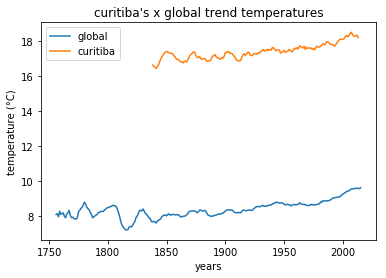

In [28]:
plt.plot(global_data_frame["year"], global_moving_average, label="global")
plt.plot(curitiba_data_frame["year"], curitiba_moving_average, label="curitiba")

plt.xlabel("years")
plt.ylabel("temperature (°C)")

plt.title("curitiba's x global trend temperatures")

plt.legend()

plt.show()

### Curitiba doesn't have sufficient historic data

In [29]:
first_curitiba_year = curitiba_data_frame.iloc[0].year
short_global_data_frame = global_data_frame[global_data_frame.year >= first_curitiba_year]
short_global_moving_average = short_global_data_frame["avg_temp"].rolling(7).mean()

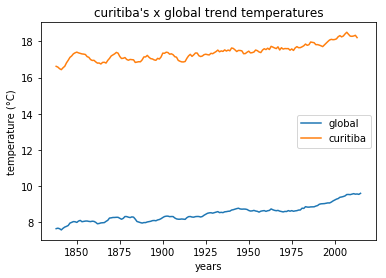

<Figure size 1440x1280 with 0 Axes>

In [30]:
plt.plot(short_global_data_frame["year"], short_global_moving_average, label="global")
plt.plot(curitiba_data_frame["year"], curitiba_moving_average, label="curitiba")

plt.xlabel("years")
plt.ylabel("temperature (°C)")

plt.title("curitiba's x global trend temperatures")

plt.legend()

plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.show()